****
# 데이터 불러오기 및 요약 

In [1]:
import pandas as pd

In [2]:
columns_list = []

for i in range(0, 21):
    columns_list.append(i)

print(columns_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [3]:
data_test = pd.read_csv('../data/BankChurners.csv', usecols=columns_list)

In [4]:
data_test.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data_test.shape

(10127, 21)

In [6]:
df = data_test

###  Attrition_Flag 값 변환
원활한 분석을 위해 우선 "Existing Customer"을 0 으로 "Attrited Customer"을 1 로 치환 후 numeric 타입으로 변환합니다.

In [7]:
data_test['Attrition_Flag'].replace("Existing Customer", "0", inplace=True)
data_test['Attrition_Flag'].replace("Attrited Customer", "1", inplace=True)

In [8]:
data_test['Attrition_Flag'] = pd.to_numeric(data_test['Attrition_Flag'])

### 결측치 확인

In [9]:
data_test.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### 데이터 타입별로 나누기

In [10]:
print(data_test.dtypes)

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [11]:
object_label = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

discrete_label = ['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

numeric_label = ['Attrition_Flag','CLIENTNUM', 'Customer_Age','Months_on_book', 'Credit_Limit', 
                'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
               'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

**object_label**
* 'Gender', 인구 통계 변수 - M=남, F=여
* 'Education_Level', 인구통계변수 - 계정주의 교육자격(예: 고등학교, 대졸 등)
* 'Marital_Status', 기록 정보 변수 - 결혼, 미혼, 이혼, 알 수 없음
* 'Income_Category', 인구통계학적 변수 - 계정 소유자의 연간 소득 범주(< 40,000달러, 40,000달러 - 60,000달러, 60,000달러 - 80,000달러, 80,000달러 - 120,000달러, >)
* 'Card_Category',  제품 변수 - 카드 유형(파랑, 실버, 골드, 플래티넘)

**discrete_label**
* 'Dependent_count', 기록 정보 변수 - 피부양자 수
* 'Total_Relationship_Count', 고객이 보유한 총 제품 수
* 'Months_Inactive_12_mon', 최근 12개월 동안 비활성 상태인 월 수
* 'Contacts_Count_12_mon', 지난 12개월 동안의 연락처 수

**numeric_label**
* 'Customer_Age', 인구통계학적 변수 - 고객의 연령(년)
* 'Months_on_book', 은행과의 관계 기간
* 'Credit_Limit',  신용 카드의 신용 한도
* 'Total_Revolving_Bal', 신용카드의 총 회전 잔액
* 'Avg_Open_To_Buy', 신용 한도 구매(최근 12개월 평균)
* 'Total_Amt_Chng_Q4_Q1', 거래 금액의 변경(1분기 대비 4분기)
* 'Total_Trans_Amt', 총거래금액(최근 12개월)
* 'Total_Trans_Ct',  총 트랜잭션 수(최근 12개월)
* 'Total_Ct_Chng_Q4_Q1',  트랜잭션 수 변경(1분기 대비 4분기)
* 'Avg_Utilization_Ratio', 평균 카드 사용률

In [12]:
print(data_test[object_label].shape)
print(data_test[discrete_label].shape)
print(data_test[numeric_label].shape)

(10127, 6)
(10127, 5)
(10127, 12)


In [13]:
object_dataset = data_test[object_label]
discrete_dataset = data_test[discrete_label]
numeric_dataset = data_test[numeric_label]

****
# 데이터 이해
object_label, discrete_label, numeric_label 로 나눈 데로 시각화해 데이터의 분포를 살펴봅니다.


## 1. object_dataset  EDA

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings


warnings.filterwarnings(action='ignore')
%matplotlib inline

In [15]:
for i in object_label:
    print('%s \n unique : %s' %(i,object_dataset[i].unique())) 

Attrition_Flag 
 unique : [0 1]
Gender 
 unique : ['M' 'F']
Education_Level 
 unique : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status 
 unique : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category 
 unique : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category 
 unique : ['Blue' 'Gold' 'Silver' 'Platinum']


### 1-1 countplot 
object_dataset 분포 확인

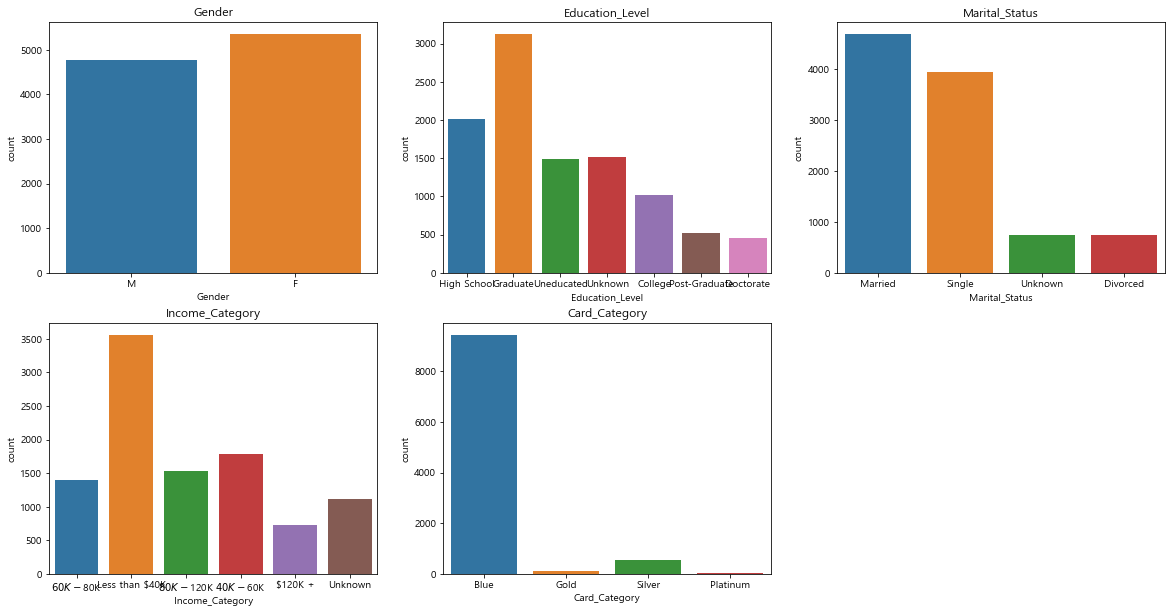

In [16]:
feature_object = object_dataset.columns

plt.figure(figsize=(20,60))

for i in range(len(feature_object)-1):
    plt.subplot(11,3,i+1)
    plt.title(feature_object[i+1])
    sns.countplot(object_dataset[feature_object[i+1]])
plt.show()

### 1-2 countplot
object_dataset 의 따른 Attrition_Flag 값 분포 확인

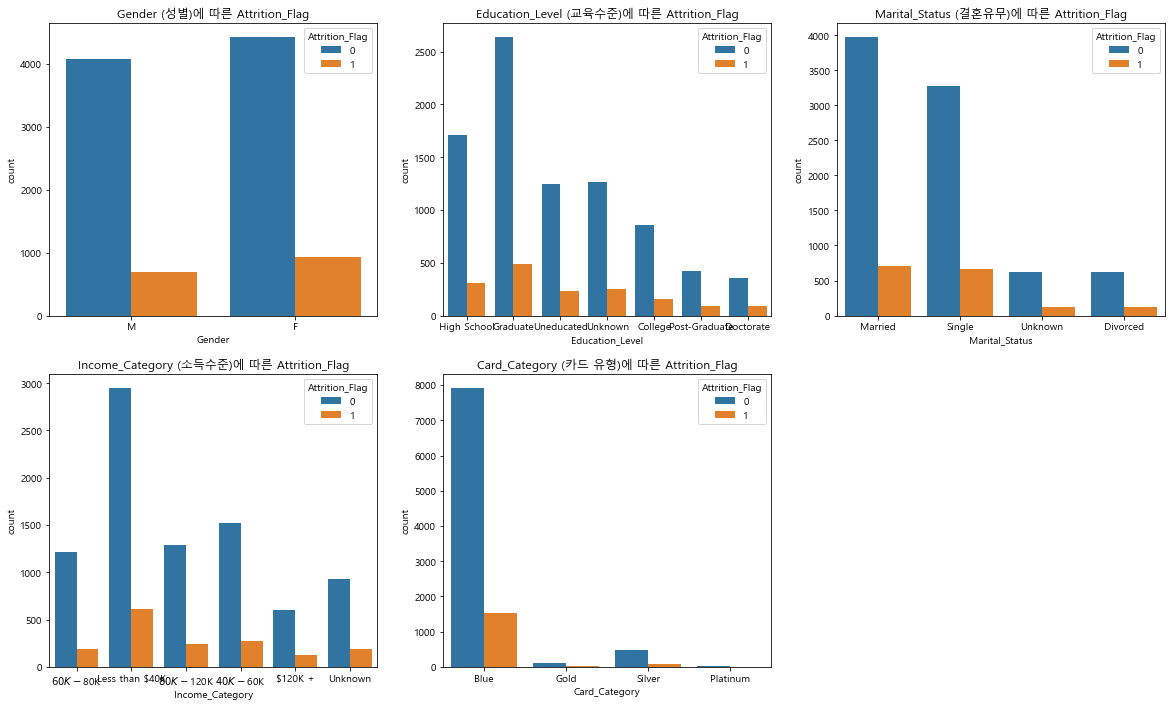

In [17]:
feature_obj = object_dataset.columns
feature_obj_label = ['(성별)','(교육수준)', '(결혼유무)', '(소득수준)', '(카드 유형)' ]


plt.figure(figsize=(20,70))


for i in range(len(feature_obj)-1):
    plt.subplot(11,3,i+1)
    plt.title("%s %s에 따른 Attrition_Flag" %(feature_obj[i+1], feature_obj_label[i]))
    sns.countplot(data=object_dataset, x=feature_obj[i+1], hue="Attrition_Flag")
plt.show()

### 그렇다면 소득수준이 높을수록 카드 등급이 다를까?

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

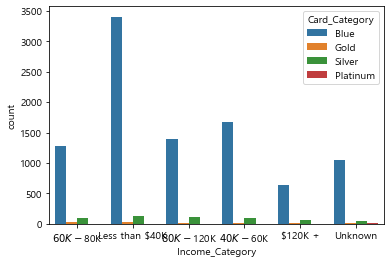

In [18]:
sns.countplot(data=object_dataset, x='Income_Category', hue="Card_Category")

>blue 회원의 분포가 골고루 많아서 분별이 어렵지만 Unknown 값에 유독 플래티넘 회원이 많은 걸 확인할 수 있다

## 2.  discrete_dataset EDA

### 2-1 countplot 
discrete_dataset 분포 확인

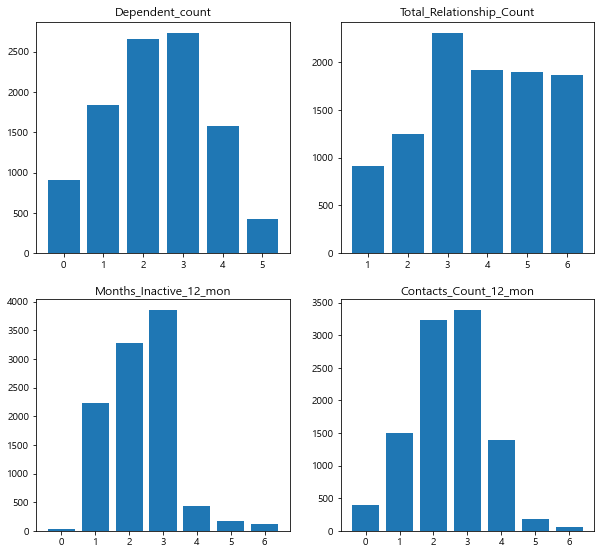

In [19]:
feature_dis= discrete_dataset.columns

plt.figure(figsize=(10,40))

for i in range(len(feature_dis)-1):
    plt.subplot(8,2,i+1)
    plt.title(feature_dis[i+1])
    temp = discrete_dataset[feature_dis[i+1]].value_counts()
    plt.bar(temp.keys(), temp.values)
plt.show()

### 2-2 countplot 
discrete_dataset 의 따른 Attrition_Flag 값 분포 확인

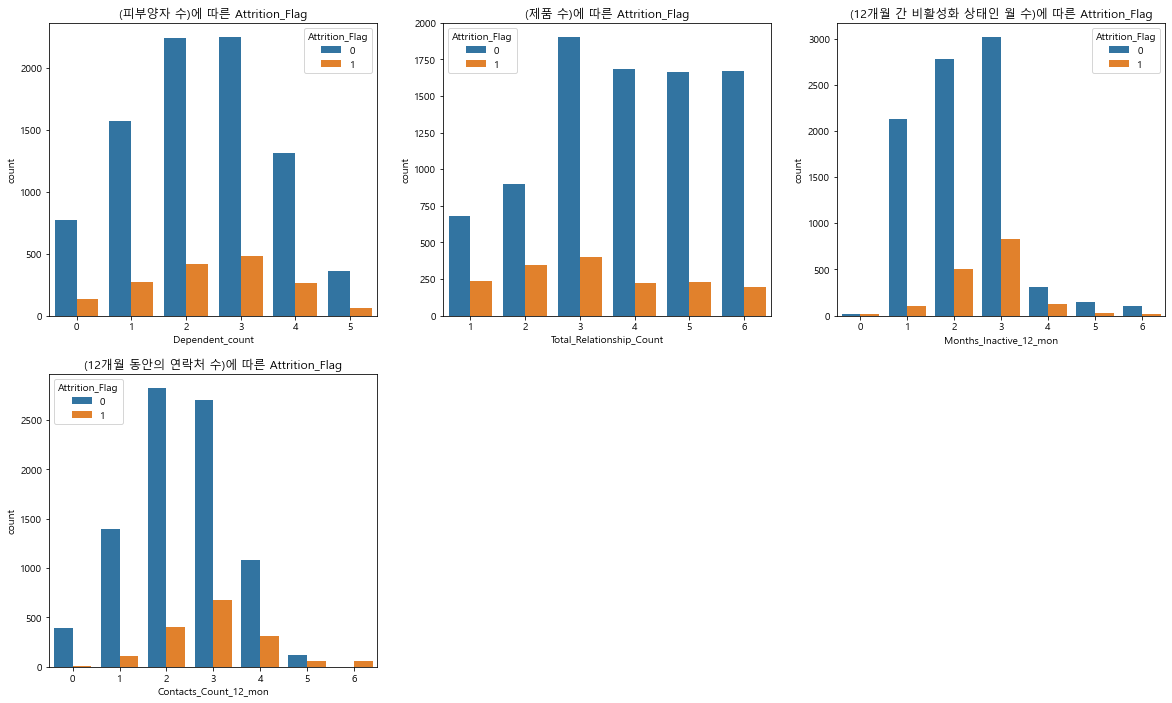

In [20]:
feature_dis_label = ['(피부양자 수)', '(제품 수)','(12개월 간 비활성화 상태인 월 수)', '(12개월 동안의 연락처 수)']

plt.figure(figsize=(20,70))


for i in range(len(feature_dis)-1):
    plt.subplot(11,3,i+1)
    plt.title("%s에 따른 Attrition_Flag" %feature_dis_label[i])
    sns.countplot(data=discrete_dataset, x=feature_dis[i+1], hue="Attrition_Flag")
plt.show()

## 3. numeric_dataset  EDA

In [21]:
numeric_dataset.describe()

,Attrition_Flag,CLIENTNUM,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,7.391776e+08,46.325960,35.928409,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,3.690378e+07,8.016814,7.986416,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,7.080821e+08,26.000000,13.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,7.130368e+08,41.000000,31.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,7.179264e+08,46.000000,36.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,7.731435e+08,52.000000,40.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,8.283431e+08,73.000000,56.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


> 극단적으로 높은 값은 존재해 보이나 -값을 갔던지 눈에 띄는 이상값은 없는 듯 합니다.

### 3-1. boxplot 
칼럼이 많으므로 보기 쉽게 boxplot으로 이상치나 데이터 범위를 살펴봅니다.

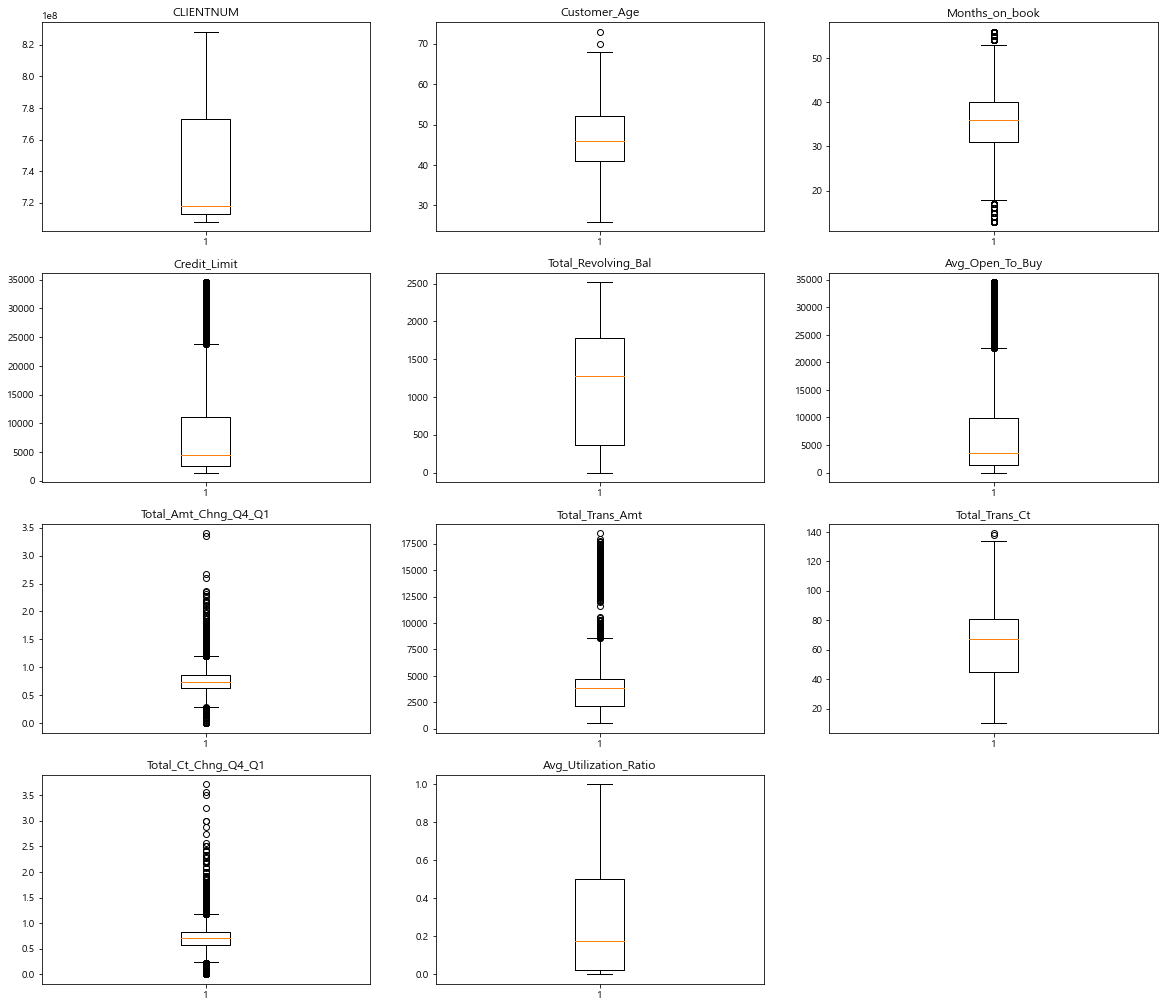

In [22]:
feature = numeric_dataset.columns

plt.figure(figsize=(20,50))
for i in range(len(feature)-1):
    plt.subplot(11,3,i+1)
    plt.title(feature[i+1])
    plt.boxplot(numeric_dataset[feature[i+1]])
plt.show()

>**(1) 이상치 처리 가늠이 되는 범주**  
>* Months on book  
>* Months_Inactive_12_mon 
>* Contacts_Count_12_mon 
>* Total_Trans_Ct


>**(2) 이상치가 많아 처리 가늠이 안되는 범주**     
-더 살펴 본 후 칼럼 제외 고려-
>* Credit_Limit
>* Avg_Open_To_Buy 
>* Total_Amt_Chng_Q4_Q1 
>* Total_Trans_Amt 
>* Total_Ct_Chng_Q4_Q1

### 3-2. distplot 
히스토그램으로 데이터의 대략적인 분포를 확인해 줍니다. 

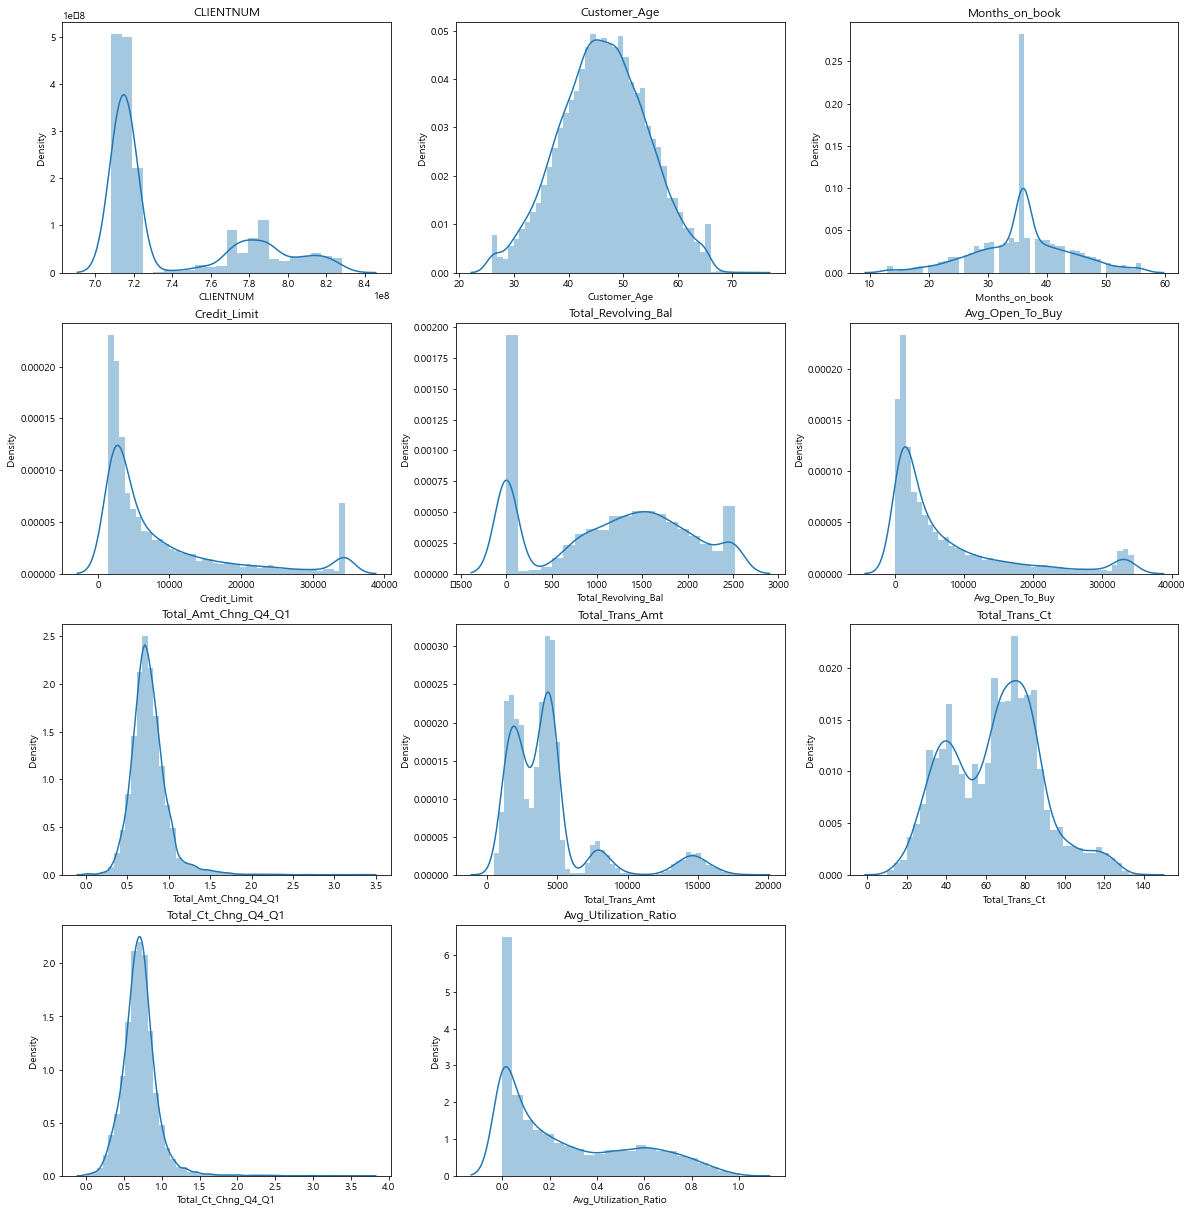

In [23]:
plt.figure(figsize=(20,60))

for i in range(len(feature)-1):
    plt.subplot(11,3,i+1)
    plt.title(feature[i+1])
    sns.distplot(numeric_dataset[feature[i+1]])
plt.show()

### 3-3. kdeplot 
Attrition_Flag 범주 별로 데이터 분포를 확인

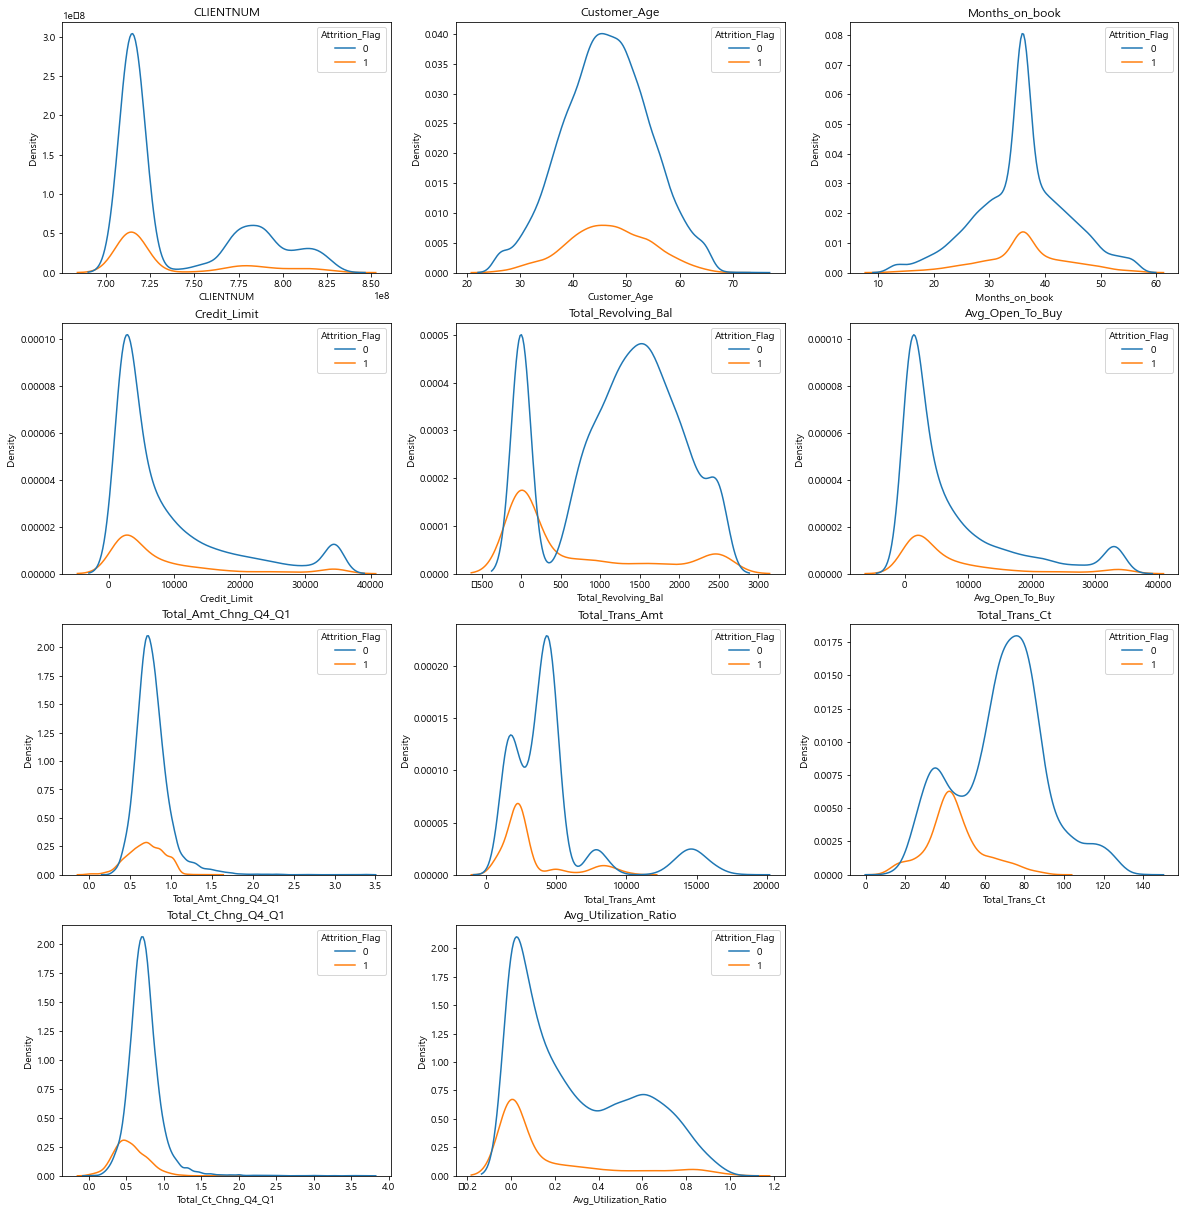

In [24]:
plt.figure(figsize=(20,60))

for i in range(len(feature)-1):
    plt.subplot(11,3,i+1)
    plt.title(feature[i+1])
    sns.kdeplot(data=data_test, x=feature[i+1], hue="Attrition_Flag")
plt.show()

> Customer_Age, Months_on_book 은 분포가 많은 값을 값을 가질 수록 이탈 확률이 높습니다.      
> 나머지 칼럼들은 대부분 0에 가까운 낮은 값을 가질 수록 이탈 확률이 높은 걸 확인해 볼 수 있습니다.        
> 눈에 띄는 점은 Credit_Limit 과 Total_Revolving_Bal 은 높은 값을 가져도 이탈확률이 있다는 것을 알 수 있습니다. 

## 4. 변수간 상관관계
(타켓변수와 상관관계를 가진 변수 확인과 다중 공선성을 확인)

**범주형**     
상관관계 분석을 위해 Labelencoding 해줍니다

In [25]:
data_test.drop(['CLIENTNUM'], axis= 1, inplace = True)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_test['Gender'] = le.fit_transform(data_test['Gender'])

data_test['Education_Level'] = le.fit_transform(data_test['Education_Level'])

data_test['Marital_Status'] = le.fit_transform(data_test['Marital_Status'])

data_test['Income_Category'] = le.fit_transform(data_test['Income_Category'])

data_test['Card_Category'] = le.fit_transform(data_test['Card_Category'])

In [27]:
for i in object_label:
    print('%s \n unique : %s' %(i,data_test[i].unique())) 

Attrition_Flag 
 unique : [0 1]
Gender 
 unique : [1 0]
Education_Level 
 unique : [3 2 5 6 0 4 1]
Marital_Status 
 unique : [1 2 3 0]
Income_Category 
 unique : [2 4 3 1 0 5]
Card_Category 
 unique : [0 1 3 2]


## 4-1 heatmap

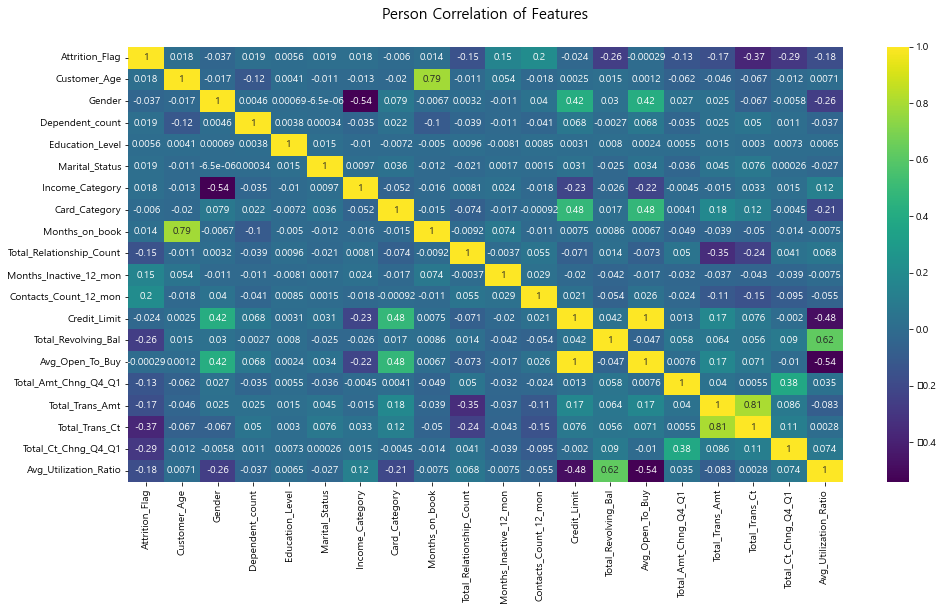

In [28]:
corr = data_test.corr()

plt.figure(figsize=(16, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(corr, cmap='viridis',  cbar = True, annot = True )

plt.show()

> * Avg_Utilization_Ratio 과 Total_Revolving_Bal **0.62 양의 상관관계**를 가지므로 다중공선성이 의심됨 
> * Avg_Utilization_Ratio 와 Avg_Open_To_Buy **-0.54 약한 음의 상관관계**를 가지므로 다중공선성이 의심됨
> * Avg_Utilization_Ratio 와 Credit_Limit **-0.48 약한 음의 상관관계**를 가지므로 다중공선성이 의심됨
> * Total_Trans_Ct 와 Total_Trans_Amt **0.81 강한 양의 상관관계**를 가지므로 다중공선성이 의심됨
> * Months_on_book 와 Customer_Age **0.79 강한 양의 상관관계** 를 가지므로 다중공선성이 의심됨
> * Avg_Open_To_Buy 와 Credit_Limit  **1 완전 양의 상관관계** 를 가지므로 다중공선성이 의심됨

## 4-2 VIF 
상관계수를 확인하고 어떤 변수에 다중공선성이 있는지 VIF 지수를 활용하여 확인해 봅니다.      
10 이상부터 다중공선성이 있는 것으로 간주

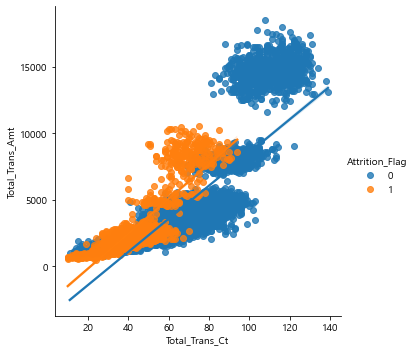

In [29]:
sns.lmplot(data=numeric_dataset, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag')
plt.show()

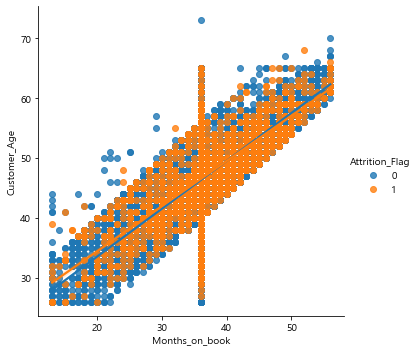

In [30]:
sns.lmplot(data=numeric_dataset, x='Months_on_book', y='Customer_Age', hue='Attrition_Flag')
plt.show()

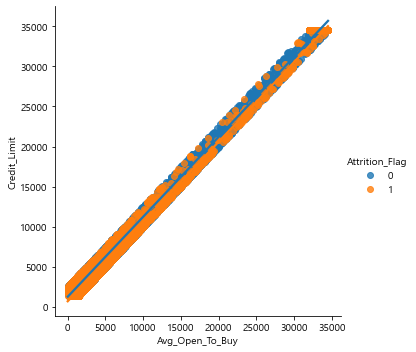

In [31]:
sns.lmplot(data=numeric_dataset, x='Avg_Open_To_Buy', y='Credit_Limit', hue='Attrition_Flag')
plt.show()

In [32]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def feature_engineering_XbyVIF(VIF_dataset):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(VIF_dataset.values, i)
                        for i in range(VIF_dataset.shape[1])]
    vif['Feature'] = VIF_dataset.columns
    return vif

vif = feature_engineering_XbyVIF(data_test)
vif

,VIF_Factor,Feature
0,1.722131,Attrition_Flag
1,78.584809,Customer_Age
2,3.044941,Gender
3,4.157959,Dependent_count
4,3.779161,Education_Level
5,4.888498,Marital_Status
6,6.054733,Income_Category
7,1.450983,Card_Category
8,56.471276,Months_on_book
9,7.733309,Total_Relationship_Count


 * 다중공선성이 가장 크고 목표 변수와 상관계수가 있는 Avg_Open_To_Buy 칼럼을 지워서 지수를 확인해 봅니다     
   다음으로도 계속해서 지수가 큰 칼럼들을 지워줍니다.

In [34]:
VIF_dataset = data_test.drop(['Avg_Open_To_Buy'], axis=1)

vif = feature_engineering_XbyVIF(VIF_dataset)
vif

,VIF_Factor,Feature
0,1.722131,Attrition_Flag
1,78.584809,Customer_Age
2,3.044941,Gender
3,4.157959,Dependent_count
4,3.779161,Education_Level
5,4.888498,Marital_Status
6,6.054733,Income_Category
7,1.450983,Card_Category
8,56.471276,Months_on_book
9,7.733309,Total_Relationship_Count


In [35]:
VIF_dataset = VIF_dataset.drop(['Customer_Age'], axis=1)

vif = feature_engineering_XbyVIF(VIF_dataset)
vif

,VIF_Factor,Feature
0,1.694696,Attrition_Flag
1,3.029044,Gender
2,4.155335,Dependent_count
3,3.758904,Education_Level
4,4.868930,Marital_Status
5,5.992585,Income_Category
6,1.450516,Card_Category
7,16.316212,Months_on_book
8,7.634644,Total_Relationship_Count
9,6.401130,Months_Inactive_12_mon


2. 원래는 가장 높은 Total_Trans_Ct 칼럼을 삭제해 주어야 하지만 목표변수와 가장 상관계수가 높기 때문에 Total_Trans_Ct 와 다중공선성이 의심되는 Total_Trans_Amt 칼럼을 지워줍니다.

In [36]:
VIF_dataset = VIF_dataset.drop(['Total_Trans_Amt'], axis=1)

vif = feature_engineering_XbyVIF(VIF_dataset)
vif

,VIF_Factor,Feature
0,1.640654,Attrition_Flag
1,3.026888,Gender
2,4.116885,Dependent_count
3,3.758862,Education_Level
4,4.842087,Marital_Status
5,5.977438,Income_Category
6,1.443846,Card_Category
7,16.137242,Months_on_book
8,7.045765,Total_Relationship_Count
9,6.376398,Months_Inactive_12_mon


In [37]:
VIF_dataset = VIF_dataset.drop(['Months_on_book'], axis=1)

vif = feature_engineering_XbyVIF(VIF_dataset)
vif

,VIF_Factor,Feature
0,1.595987,Attrition_Flag
1,2.990458,Gender
2,4.115081,Dependent_count
3,3.728934,Education_Level
4,4.800514,Marital_Status
5,5.848420,Income_Category
6,1.442040,Card_Category
7,6.759186,Total_Relationship_Count
8,6.144649,Months_Inactive_12_mon
9,5.850418,Contacts_Count_12_mon


In [38]:
VIF_dataset = VIF_dataset.drop(['Total_Amt_Chng_Q4_Q1'], axis=1)

vif = feature_engineering_XbyVIF(VIF_dataset)
vif

,VIF_Factor,Feature
0,1.582433,Attrition_Flag
1,2.952611,Gender
2,4.111189,Dependent_count
3,3.714138,Education_Level
4,4.797043,Marital_Status
5,5.765750,Income_Category
6,1.442022,Card_Category
7,6.565753,Total_Relationship_Count
8,6.118616,Months_Inactive_12_mon
9,5.792742,Contacts_Count_12_mon


****
# 전처리

## 1. classing 구간화
최근 은행권에서 많이 사용되고 있는 **OptBinning** 라이브러리로 데이터를 연속형 데이터를 범주화 해주어 이산형 데이터처럼 활용하여 성능을 올릴 수 있도록 합니다.

>**OptBinning이란?**    
이전에 해결되지 않은 제약 조건을 통합하여 이진, 연속 및 다중 클래스 대상 유형에 대한 최적의 비닝 문제를 해결하기 위해 엄격하고 유연한 수학 프로그래밍 공식을 구현하는 Python으로 작성된 라이브러리입니다.       

>**공식 배포자료**     
>https://github.com/guillermo-navas-palencia/optbinning

In [39]:
from optbinning import ContinuousOptimalBinning

In [40]:
numeric_label2 = list(VIF_dataset.iloc[:, 10:].columns)
numeric_label2

['Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [41]:
target_col = data_test['Attrition_Flag'].values

In [42]:
series_for_columns = []

for i in numeric_label2:
    test_col = data_test[i]
    
    optb = ContinuousOptimalBinning(name=i, dtype="numerical")
    
    optb.fit(test_col, target_col)
    
    binning_table = optb.binning_table
    
    binning_table.build()
    
    test_bin = optb.transform(test_col, metric="bins")
    opt_complete = pd.Series(test_bin)
    
    series_for_columns.append(opt_complete)

In [43]:
opt_bin = pd.DataFrame(series_for_columns)
opt_bin = opt_bin.transpose()

In [44]:
opt_bin.head()

,0,1,2,3,4
0,"[12047.50, 22381.00)","[581.50, 979.50)","[41.50, 47.50)","[1.02, inf)","[0.05, 0.32)"
1,"[5061.50, 9130.00)","[581.50, 979.50)","(-inf, 37.50)","[1.02, inf)","[0.05, 0.32)"
2,"[2801.50, 5061.50)","(-inf, 581.50)","(-inf, 37.50)","[1.02, inf)","(-inf, 0.02)"
3,"[2801.50, 5061.50)","[2512.50, inf)","(-inf, 37.50)","[1.02, inf)","[0.71, 0.79)"
4,"[2801.50, 5061.50)","(-inf, 581.50)","(-inf, 37.50)","[1.02, inf)","(-inf, 0.02)"


In [45]:
opt_bin.rename(columns = {0:'bin_Credit_Limit', 1:'bin_Total_Revolving_Bal', 2:'bin_Total_Trans_Ct',
                    3: 'bin_Total_Ct_Chng_Q4_Q1', 4: 'bin_Avg_Utilization_Ratio'}, inplace = True)

In [46]:
opt_bin

,bin_Credit_Limit,bin_Total_Revolving_Bal,bin_Total_Trans_Ct,bin_Total_Ct_Chng_Q4_Q1,bin_Avg_Utilization_Ratio
0,"[12047.50, 22381.00)","[581.50, 979.50)","[41.50, 47.50)","[1.02, inf)","[0.05, 0.32)"
1,"[5061.50, 9130.00)","[581.50, 979.50)","(-inf, 37.50)","[1.02, inf)","[0.05, 0.32)"
2,"[2801.50, 5061.50)","(-inf, 581.50)","(-inf, 37.50)","[1.02, inf)","(-inf, 0.02)"
3,"[2801.50, 5061.50)","[2512.50, inf)","(-inf, 37.50)","[1.02, inf)","[0.71, 0.79)"
4,"[2801.50, 5061.50)","(-inf, 581.50)","(-inf, 37.50)","[1.02, inf)","(-inf, 0.02)"
...,...,...,...,...,...
10122,"[2801.50, 5061.50)","[1757.50, 1966.50)","[104.50, inf)","[0.85, 1.02)","[0.45, 0.63)"
10123,"[2801.50, 5061.50)","[1966.50, 2512.50)","[64.50, 71.50)","[0.66, 0.75)","[0.45, 0.63)"
10124,"[5061.50, 9130.00)","(-inf, 581.50)","[54.50, 60.50)","[0.75, 0.85)","(-inf, 0.02)"
10125,"[5061.50, 9130.00)","(-inf, 581.50)","[60.50, 64.50)","[0.66, 0.75)","(-inf, 0.02)"


****
>연속형 테이터를 optbinning으로 범주화 해준 후 df 데이터프레임 만들었습니다.     
이제 기존에 VIF 지수로 걸러냈던 VIF_dataset 에 값을 붙여줍니다.
****



In [47]:
merge_frame = pd.merge(VIF_dataset, opt_bin, left_index=True, right_index=True, how='left')
merge_frame.shape

(10127, 20)

In [48]:
print(merge_frame.dtypes)

Attrition_Flag                 int64
Gender                         int32
Dependent_count                int64
Education_Level                int32
Marital_Status                 int32
Income_Category                int32
Card_Category                  int32
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
bin_Credit_Limit              object
bin_Total_Revolving_Bal       object
bin_Total_Trans_Ct            object
bin_Total_Ct_Chng_Q4_Q1       object
bin_Avg_Utilization_Ratio     object
dtype: object


## 2. Encoding 
모델링을 위해 이산형 데이터를 인코딩 해 줍니다.

> unique 한 값을 확인해 봤을때 잘 분류가 된 거 같습니다.


**Labelencoding**      
구간화해준 numeric 칼럼들 또한 Labelencoding 해줍니다


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merge_frame['bin_Credit_Limit'] = le.fit_transform(merge_frame['bin_Credit_Limit'])
merge_frame['bin_Total_Revolving_Bal'] = le.fit_transform(merge_frame['bin_Total_Revolving_Bal'])
merge_frame['bin_Total_Trans_Ct'] = le.fit_transform(merge_frame['bin_Total_Trans_Ct'])
merge_frame['bin_Total_Ct_Chng_Q4_Q1'] = le.fit_transform(merge_frame['bin_Total_Ct_Chng_Q4_Q1'])
merge_frame['bin_Avg_Utilization_Ratio'] = le.fit_transform(merge_frame['bin_Avg_Utilization_Ratio'])

In [50]:
for i in list(opt_bin.columns):
    print('%s \n unique : %s' %(i,merge_frame[i].unique())) 

bin_Credit_Limit 
 unique : [1 6 4 5 3 7 2 0]
bin_Total_Revolving_Bal 
 unique : [7 0 6 1 5 2 3 4 8]
bin_Total_Trans_Ct 
 unique : [ 3  0  2  5  4  6  9  7  8 11 10 12  1]
bin_Total_Ct_Chng_Q4_Q1 
 unique : [9 7 6 8 4 0 1 3 2 5]
bin_Avg_Utilization_Ratio 
 unique : [2 0 6 1 4 5 3 7]


>데이터가 전부 잘 수치화 되었음을 확인할 수 있습니다.

**One-hot-encoding**

In [51]:
merge_frame

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,bin_Credit_Limit,bin_Total_Revolving_Bal,bin_Total_Trans_Ct,bin_Total_Ct_Chng_Q4_Q1,bin_Avg_Utilization_Ratio
0,0,1,3,3,1,2,0,5,1,3,12691.0,777,42,1.625,0.061,1,7,3,9,2
1,0,0,5,2,2,4,0,6,1,2,8256.0,864,33,3.714,0.105,6,7,0,9,2
2,0,1,3,2,1,3,0,4,1,0,3418.0,0,20,2.333,0.000,4,0,0,9,0
3,0,0,4,3,3,4,0,3,4,1,3313.0,2517,20,2.333,0.760,4,6,0,9,6
4,0,1,3,5,1,2,0,5,1,0,4716.0,0,28,2.500,0.000,4,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,2,2,2,1,0,3,2,3,4003.0,1851,117,0.857,0.462,4,4,1,8,4
10123,1,1,2,6,0,1,0,4,2,3,4277.0,2186,69,0.683,0.511,4,5,7,6,4
10124,1,0,1,3,1,4,0,5,3,4,5409.0,0,60,0.818,0.000,6,0,5,7,0
10125,1,1,2,2,3,1,0,4,3,3,5281.0,0,62,0.722,0.000,6,0,6,6,0


In [52]:
merge_frame = pd.get_dummies(merge_frame, columns=['Education_Level', 'Income_Category', 'Card_Category'])

****
## 구간화한 테이블을 간단히 살펴봅니다.

In [53]:
binning_frame = merge_frame[list(opt_bin.columns)]

In [54]:
feature = binning_frame.columns
feature

Index(['bin_Credit_Limit', 'bin_Total_Revolving_Bal', 'bin_Total_Trans_Ct',
       'bin_Total_Ct_Chng_Q4_Q1', 'bin_Avg_Utilization_Ratio'],
      dtype='object')

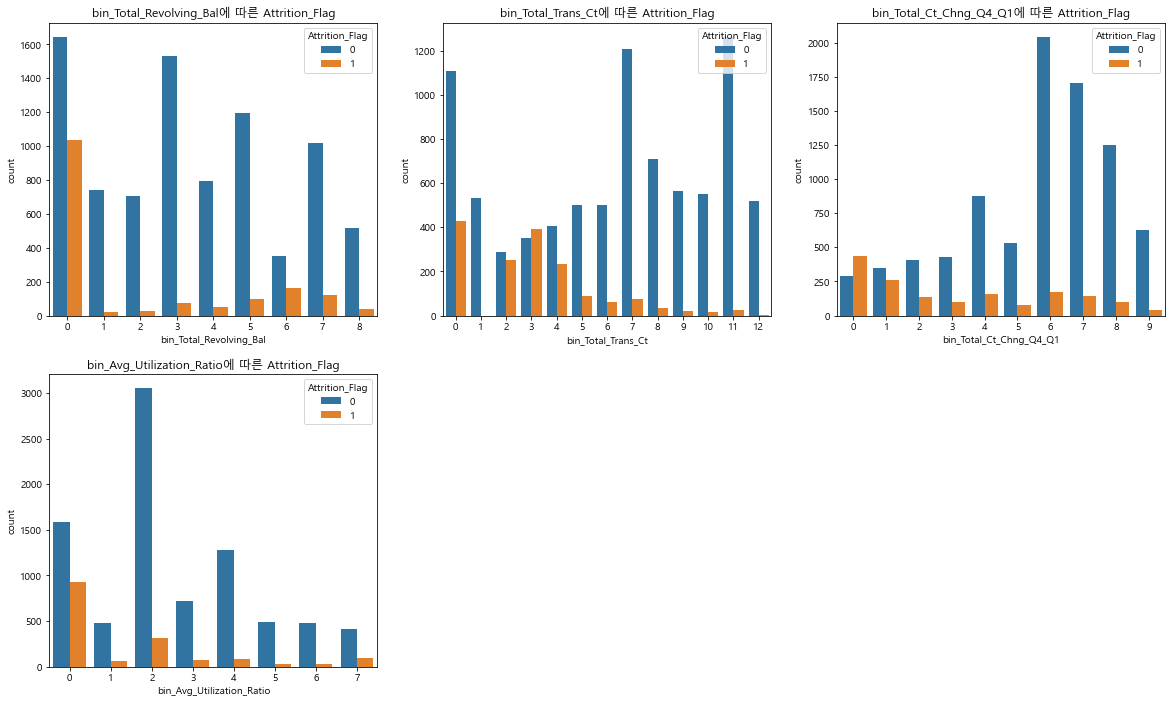

In [55]:
plt.figure(figsize=(20,70))

for i in range(len(feature)-1):
    plt.subplot(11,3,i+1)
    plt.title("%s에 따른 Attrition_Flag" %feature[i+1])
    sns.countplot(data=merge_frame, x=feature[i+1], hue="Attrition_Flag")
plt.show()

In [56]:
merge_frame.to_csv('../data/pearson_binning.csv', index=False, encoding='cp949')

In [57]:
merge_frame.drop(numeric_label2, axis=1 , inplace = True)

****
# 데이터 변환

In [58]:
merge_frame.head()

,Attrition_Flag,Gender,Dependent_count,Marital_Status,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,bin_Credit_Limit,bin_Total_Revolving_Bal,bin_Total_Trans_Ct,...,Income_Category_0,Income_Category_1,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_5,Card_Category_0,Card_Category_1,Card_Category_2,Card_Category_3
0,0,1,3,1,5,1,3,1,7,3,...,0,0,1,0,0,0,1,0,0,0
1,0,0,5,2,6,1,2,6,7,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,3,1,4,1,0,4,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,4,3,3,4,1,4,6,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,3,1,5,1,0,4,0,0,...,0,0,1,0,0,0,1,0,0,0


In [59]:
from sklearn.model_selection import train_test_split

card_data = merge_frame.iloc[:,1:]
card_target = merge_frame['Attrition_Flag']

print(card_data.shape)
print(card_target.shape)

X_train, X_test, y_train, y_test = train_test_split(card_data, card_target, 
                                                    test_size=0.2, random_state=12)


(10127, 28)
(10127,)


****
# Modelling

성능평가 참고 https://mizykk.tistory.com/102

**SMOTE**

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train, y_train)

**LogisticRegression**

In [61]:
import sklearn.metrics as metrics

In [62]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train_over, y_train_over)

LogisticRegression()

In [63]:
log = logistic.predict(X_test)

In [64]:
print('로지스틕 회귀 정확도 :',metrics.accuracy_score(y_test, log))
print('로지스틕 회귀  정밀도 ', metrics.precision_score(y_test, log))
print('로지스틕 회귀  재현율 ', metrics.recall_score(y_test, log))
print('로지스틕 회귀  F1_SCORE :',metrics.f1_score(y_test, log))

로지스틕 회귀 정확도 : 0.8800592300098716
로지스틕 회귀  정밀도  0.6360424028268551
로지스틕 회귀  재현율  0.5625
로지스틕 회귀  F1_SCORE : 0.5970149253731343


## ensemble
**Randomforest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

In [66]:
forest_clf.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [67]:
rf = forest_clf.predict(X_test)

In [68]:
print('랜덤 포레스트 정확도 :',metrics.accuracy_score(y_test, rf))
print('랜덤 포레스트  정밀도 ', metrics.precision_score(y_test, rf))
print('랜덤 포레스트 재현율 ', metrics.recall_score(y_test, rf))
print('랜덤 포레스트 F1_SCORE :',metrics.f1_score(y_test, rf))

랜덤 포레스트 정확도 : 0.9170779861796644
랜덤 포레스트  정밀도  0.7451612903225806
랜덤 포레스트 재현율  0.721875
랜덤 포레스트 F1_SCORE : 0.7333333333333334


**XGBboost** 분류모델

In [69]:
from xgboost import XGBClassifier

XGBclass = XGBClassifier()

XGBclass.fit(X_train_over, y_train_over)

[16:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
XGB = XGBclass.predict(X_test)

In [71]:
print('XGB부스트 정확도 :',metrics.accuracy_score(y_test, XGB))
print('XGB부스트  정밀도 ', metrics.precision_score(y_test, XGB))
print('XGB부스트 재현율 ', metrics.recall_score(y_test, XGB))
print('XGB부스트 F1_SCORE :',metrics.f1_score(y_test, XGB))

XGB부스트 정확도 : 0.926949654491609
XGB부스트  정밀도  0.7756410256410257
XGB부스트 재현율  0.75625
XGB부스트 F1_SCORE : 0.7658227848101266


**LGBM**

In [72]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_over, y_train_over)
lgbm = lgbm_model.predict(X_test)

In [73]:
print('LGBM 정확도 :',metrics.accuracy_score(y_test, lgbm))
print('LGBM  정밀도 ', metrics.precision_score(y_test, lgbm))
print('LGBM  재현율 ', metrics.recall_score(y_test, lgbm))
print('LGBM  F1_SCORE :',metrics.f1_score(y_test, lgbm))

LGBM 정확도 : 0.930898321816387
LGBM  정밀도  0.7884615384615384
LGBM  재현율  0.76875
LGBM  F1_SCORE : 0.7784810126582279


****
# Shap Value
이외에도 데이터를 전부 구간화하였기 때문에 변수간 관계를 분석하는 데 어려움이 있어 먼저 모델을 만들어주고 영향력을 주는 변수를 살펴본 뒤 변수를 제거하는 작업을 합니다. 요즘 많이 활용하는 Shap value를 활용하여 모델에서 Attrition_Flag 에 가장 영향을 주는 변수를 찾아봅니다.

> 참고  https://todayisbetterthanyesterday.tistory.com/57

In [74]:
import shap

In [75]:
explainer = shap.TreeExplainer(XGBclass)
shap_values = explainer.shap_values(X_test)

In [76]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

> * 가장 큰 양의 영향도를 가진 변수 2개  Avg_Utilization_Ratio, Contacts_Count_12_mon        
> * 가장 큰 음의 영향도를 가진 변수 2개  Total_Trans_Ct, Credit_Limit, 

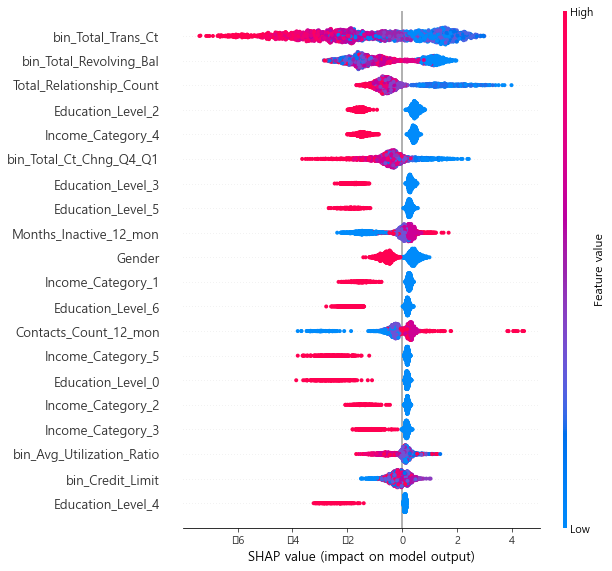

In [77]:
shap.summary_plot(shap_values, X_test)

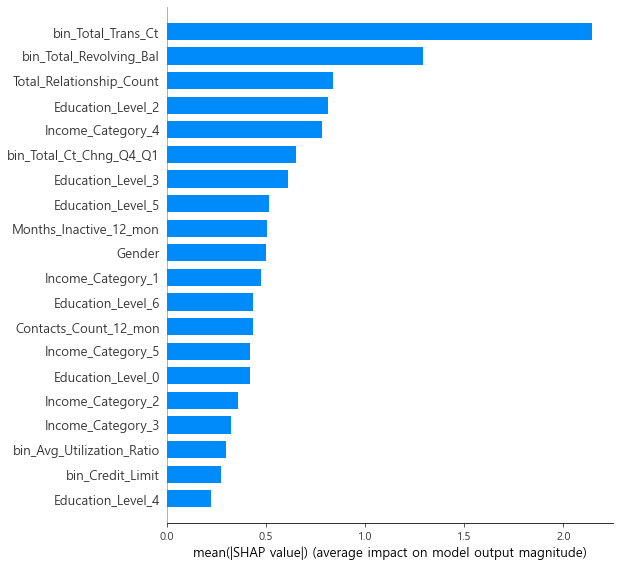

In [78]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")